<a href="https://colab.research.google.com/github/jcsolanob/hr-analytics-attrition/blob/main/Notebook/hr_attrition_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplot

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 29.6 MB/s eta 0:00:00
  Created wheel for SimpleWebSocketServer: filename=SimpleWebSocketServer-0.1.2-py3-none-any.whl size=9667 sha256=3db6087add9cb74af52724215375f2e4447572be8eb43307a6c1557c6b9d4559
  Stored in directory: /root/.cache/pip/wheels/81/fd/d8/f145b47bedceb5dff96b76e404a4ee9be956a4f8f150cd8133
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=743b3d45d37b185e308fcc4e3daa2bf1f5e535cd303e36364d5a3ece7871891b
  Stored in directory: /root/.cache/pip/wheels/12/98/52/2bffe242a9a487f00886e43b8ed8dac46456702e11a0d6abef
  Created wheel

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#We are going to import the data from the CSV uploaded to Github
url = "https://raw.githubusercontent.com/jcsolanob/hr-analytics-attrition/refs/heads/main/data/WA_Fn-UseC_-HR-Employee-Attrition.csv"
df_raw = pd.read_csv(url)
df_raw.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#Create a copy of the dataset to work on the local copy instead the original data
df_clean = df_raw.copy()

In [ ]:
#Checking if all the employee numbers are different
df_clean['EmployeeNumber'].nunique()

1470

In [ ]:
#We are going to move the column 'EmployeeNumber' to the begining as we can use it as primary key if needed
columns_new = ['EmployeeNumber'] + [col for col in df_clean.columns if col != 'EmployeeNumber']
df_clean = df_clean[columns_new]
df_clean = df_clean.drop('EmployeeCount', axis = 1)
df_clean = df_clean.set_index(df_clean.columns[0])
df_clean.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#Lets going to check the basic dataset info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction           147

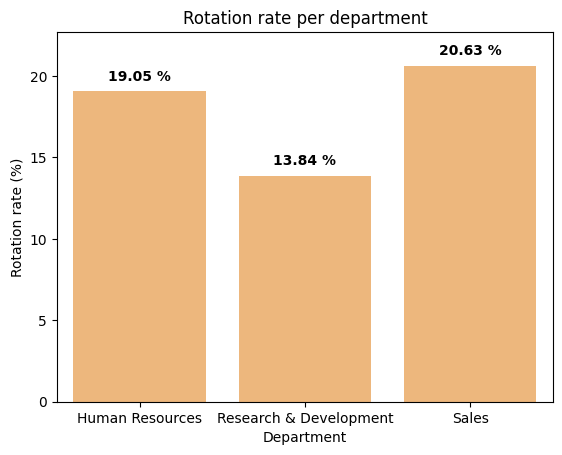

In [84]:
#Lets going to check the rotation rate per department
total_per_dept = df_clean.groupby('Department')['Attrition'].count()
gone_by_dept = df_clean[df_clean['Attrition'] == 'Yes'].groupby('Department')['Attrition'].count()
rotation_rate = (gone_by_dept / total_per_dept) * 100

sns.barplot(x=rotation_rate.index, y=rotation_rate.values, color = '#FFB86B')
plt.ylim(0, max(rotation_rate.values) * 1.1)
for i, value in enumerate(rotation_rate.values):
  plt.text(i, value + 0.5, f'{value:.2f} %',
           ha = 'center', va = 'bottom',
           fontweight = 'bold', fontsize = 10)
plt.ylabel("Rotation rate (%)")
plt.title("Rotation rate per department")
plt.show()

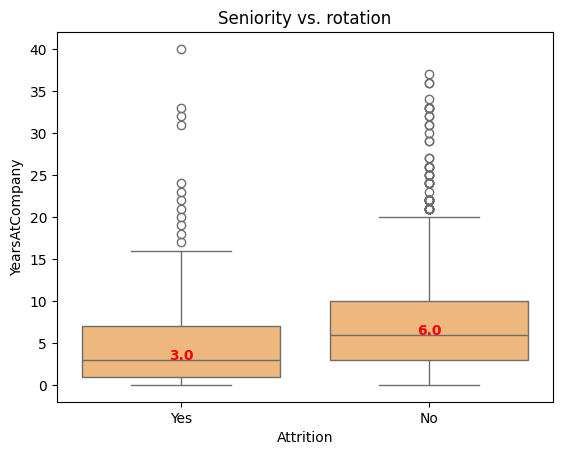

In [67]:
#Now lets going to check how the years at the company, salary and satisfaction level influence the decision to leave
order = ['Yes', 'No']
sns.boxplot(x = 'Attrition', y = 'YearsAtCompany', data = df_clean, color = '#FFB86B')
plt.title("Seniority vs. rotation")
medians = df_clean.groupby('Attrition')['YearsAtCompany'].median().reindex(order)

#Add medians to the graph
for i, value in enumerate(medians):
    plt.text(i, value, f'{value:.1f}', horizontalalignment='center', color='red', weight='bold')
plt.show()

In [ ]:
iqr_por_grupo = df_clean.groupby('Attrition')['YearsAtCompany'].agg(
    Q1 = lambda x: x.quantile(0.25),
    Q3 = lambda x: x.quantile(0.75),
    IQR = lambda x: x.quantile(0.75) - x.quantile(0.25)
)

print(iqr_por_grupo)

            Q1    Q3  IQR
Attrition                
No         3.0  10.0  7.0
Yes        1.0   7.0  6.0


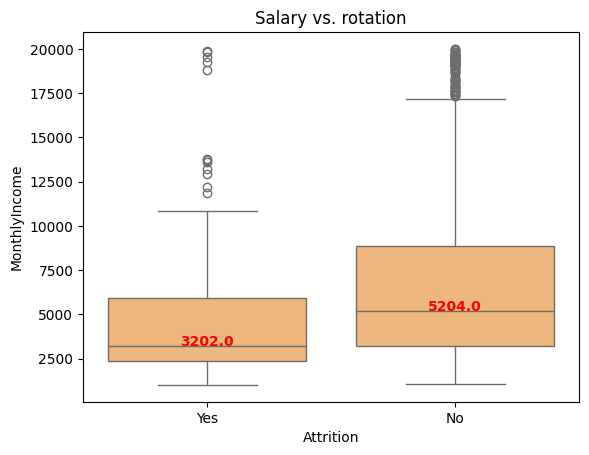

In [68]:
order = ['Yes', 'No']
sns.boxplot(x = 'Attrition', y = 'MonthlyIncome', data = df_clean, color = '#FFB86B')
plt.title("Salary vs. rotation")
medians = df_clean.groupby('Attrition')['MonthlyIncome'].median().reindex(order)

#Add medians to the graph
for i, value in enumerate(medians):
    plt.text(i, value, f'{value:.1f}', horizontalalignment='center', color='red', weight='bold')
plt.show()

In [ ]:
iqr_por_grupo = df_clean.groupby('Attrition')['MonthlyIncome'].agg(
    Q1 = lambda x: x.quantile(0.25),
    Q3 = lambda x: x.quantile(0.75),
    IQR = lambda x: x.quantile(0.75) - x.quantile(0.25)
)

print(iqr_por_grupo)

               Q1      Q3     IQR
Attrition                        
No         3211.0  8834.0  5623.0
Yes        2373.0  5916.0  3543.0


In [ ]:
#Calculate the salary average based on attrition
means = df_clean.groupby('Attrition')['MonthlyIncome'].mean()
means

,MonthlyIncome
Attrition,
No,6832.739659
Yes,4787.092827


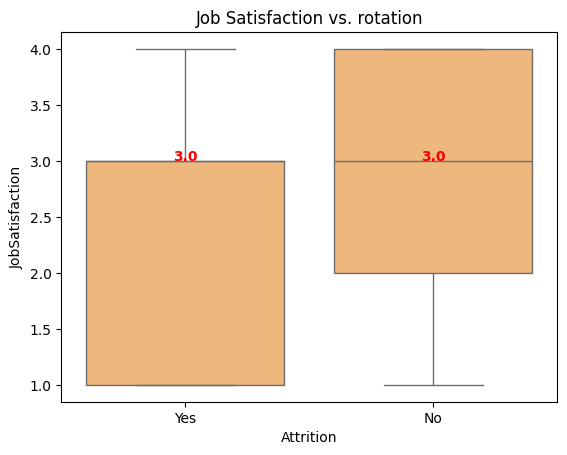

In [69]:
order = ['Yes', 'No']
sns.boxplot(x = 'Attrition', y = 'JobSatisfaction', data = df_clean, color = '#FFB86B')
plt.title("Job Satisfaction vs. rotation")
medians = df_clean.groupby('Attrition')['JobSatisfaction'].median().reindex(order)

#Add medians to the graph
for i, value in enumerate(medians):
    plt.text(i, value, f'{value:.1f}', horizontalalignment='center', color='red', weight='bold')
plt.show()

In [ ]:
iqr_por_grupo = df_clean.groupby('Attrition')['JobSatisfaction'].agg(
    Q1 = lambda x: x.quantile(0.25),
    Q3 = lambda x: x.quantile(0.75),
    IQR = lambda x: x.quantile(0.75) - x.quantile(0.25)
)

print(iqr_por_grupo)

            Q1   Q3  IQR
Attrition               
No         2.0  4.0  2.0
Yes        1.0  3.0  2.0


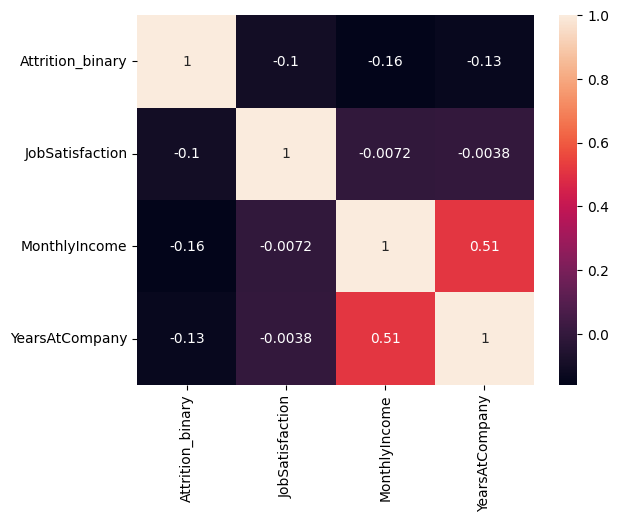

In [ ]:
df_clean['Attrition_binary'] = df_clean['Attrition'].map({'Yes': 1, 'No': 0})
correlation = df_clean[['Attrition_binary', 'JobSatisfaction', 'MonthlyIncome', 'YearsAtCompany']].corr()
sns.heatmap(correlation, annot = True)
plt.show()

In [ ]:
df_clean['Age'].describe()

,Age
count,1470.000000
mean,36.923810
std,9.135373
min,18.000000
25%,30.000000
50%,36.000000
75%,43.000000
max,60.000000


In [35]:
print("The minimum age is", df_clean['Age'].min(), "and the maximum age is", df_clean['Age'].max())

The minimum age is 18 and the maximum age is 60


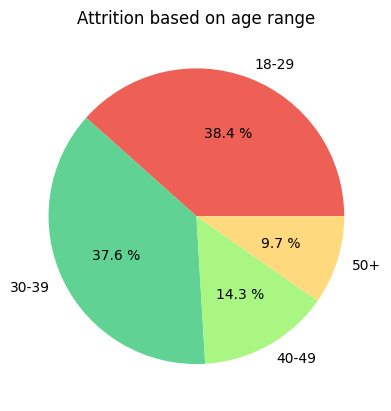

In [53]:
#Lets going to verify the attrition based on age
bins = [18, 30, 40, 50, 100]
labels = ['18-29', '30-39', '40-49', '50+']
df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins = bins, labels = labels, right = False)
gone_by_age = df_clean[df_clean['Attrition'] == 'Yes'].groupby('AgeGroup', observed=True)['Attrition'].count()

colors = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
plt.pie(gone_by_age.values, labels = gone_by_age.index, autopct="%0.1f %%", colors=colors)
plt.title("Attrition based on age range")
plt.show()

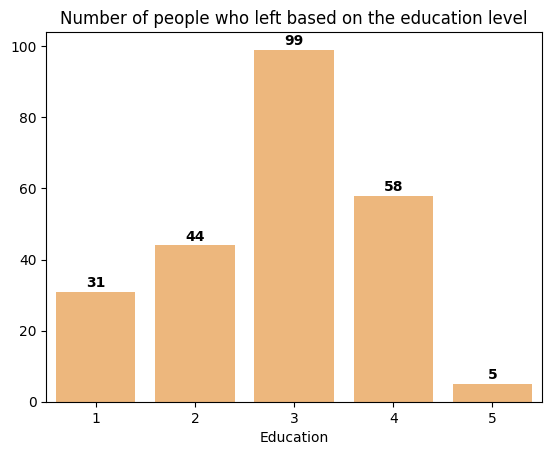

In [77]:
#Checkin attrition based on education level
gone_based_edu = df_clean[df_clean['Attrition'] == 'Yes'].groupby('Education')['Attrition'].count()
sns.barplot(x = gone_based_edu.index, y = gone_based_edu.values, color = '#FFB86B')
for i, value in enumerate(gone_based_edu.values):
    plt.text(i, value + 0.5, f'{value}',
             ha='center', va='bottom',
             fontweight='bold', fontsize=10)

plt.title("Number of people who left based on the education level")
plt.show()

In [87]:
print("The number of unique values in the column Over18 is", df_clean['Over18'].nunique())

The number of unique values in the column Over18 is 1


In [88]:
#As everyone is over 18 the column 'Over18' is not relevant, lets going to drop it
df_clean = df_clean.drop('Over18', axis = 1)

In [92]:
from google.colab import files
df_clean.to_csv('df_clean.csv', index=True)
files.download('df_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>